In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [32]:
#1. Data Loading and Initial Inspection
# Load the dataset
df = pd.read_csv('Diabetes.csv')

# Remove any extra spaces from the column names
df.columns = df.columns.str.strip()

In [34]:
# Print first few rows and basic info
print("Head of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())

Head of the dataset:
   Number of times pregnant  Plasma glucose concentration  \
0                         6                           148   
1                         1                            85   
2                         8                           183   
3                         1                            89   
4                         0                           137   

   Diastolic blood pressure  Triceps skin fold thickness  \
0                        72                           35   
1                        66                           29   
2                        64                            0   
3                        66                           23   
4                        40                           35   

   2-Hour serum insulin  Body mass index  Diabetes pedigree function  \
0                     0             33.6                       0.627   
1                     0             26.6                       0.351   
2                     0            

In [36]:
 #2.Data Cleaning & Preprocessing
# -------------------------------

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Convert the "Outcome" column from YES/NO to binary (1 for YES, 0 for NO)
df['Outcome'] = df['Outcome'].str.strip().map({'YES': 1, 'NO': 0})
print("\nOutcome value counts:")
print(df['Outcome'].value_counts())


Missing values in each column:
Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age (years)                     0
Outcome                         0
dtype: int64

Outcome value counts:
Outcome
0    500
1    268
Name: count, dtype: int64


In [12]:
# checking for duplicates in the data sets
# Check for duplicate rows
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()

print(f"\nNumber of duplicate rows: {num_duplicates}")

# Optional: View the duplicate rows
if num_duplicates > 0:
    print("\nDuplicate rows:\n", df[duplicate_rows])



Number of duplicate rows: 0


In [40]:
#3. Outlier Detection and Treatment

#List of numeric feature names
numeric_cols = [
    "Number of times pregnant", 
    "Plasma glucose concentration",
    "Diastolic blood pressure", 
    "Triceps skin fold thickness",
    "2-Hour serum insulin", 
    "Body mass index", 
    "Diabetes pedigree function", 
    "Age (years)"
]
# Cap outliers using the IQR method for each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("\nSummary statistics after outlier treatment:")
print(df[numeric_cols].describe())



Summary statistics after outlier treatment:
       Number of times pregnant  Plasma glucose concentration  \
count                768.000000                    768.000000   
mean                   3.837240                    121.136230   
std                    3.344157                     31.187468   
min                    0.000000                     37.125000   
25%                    1.000000                     99.000000   
50%                    3.000000                    117.000000   
75%                    6.000000                    140.250000   
max                   13.500000                    199.000000   

       Diastolic blood pressure  Triceps skin fold thickness  \
count                768.000000                   768.000000   
mean                  70.684896                    20.511719   
std                   14.197239                    15.844744   
min                   35.000000                     0.000000   
25%                   62.000000                  

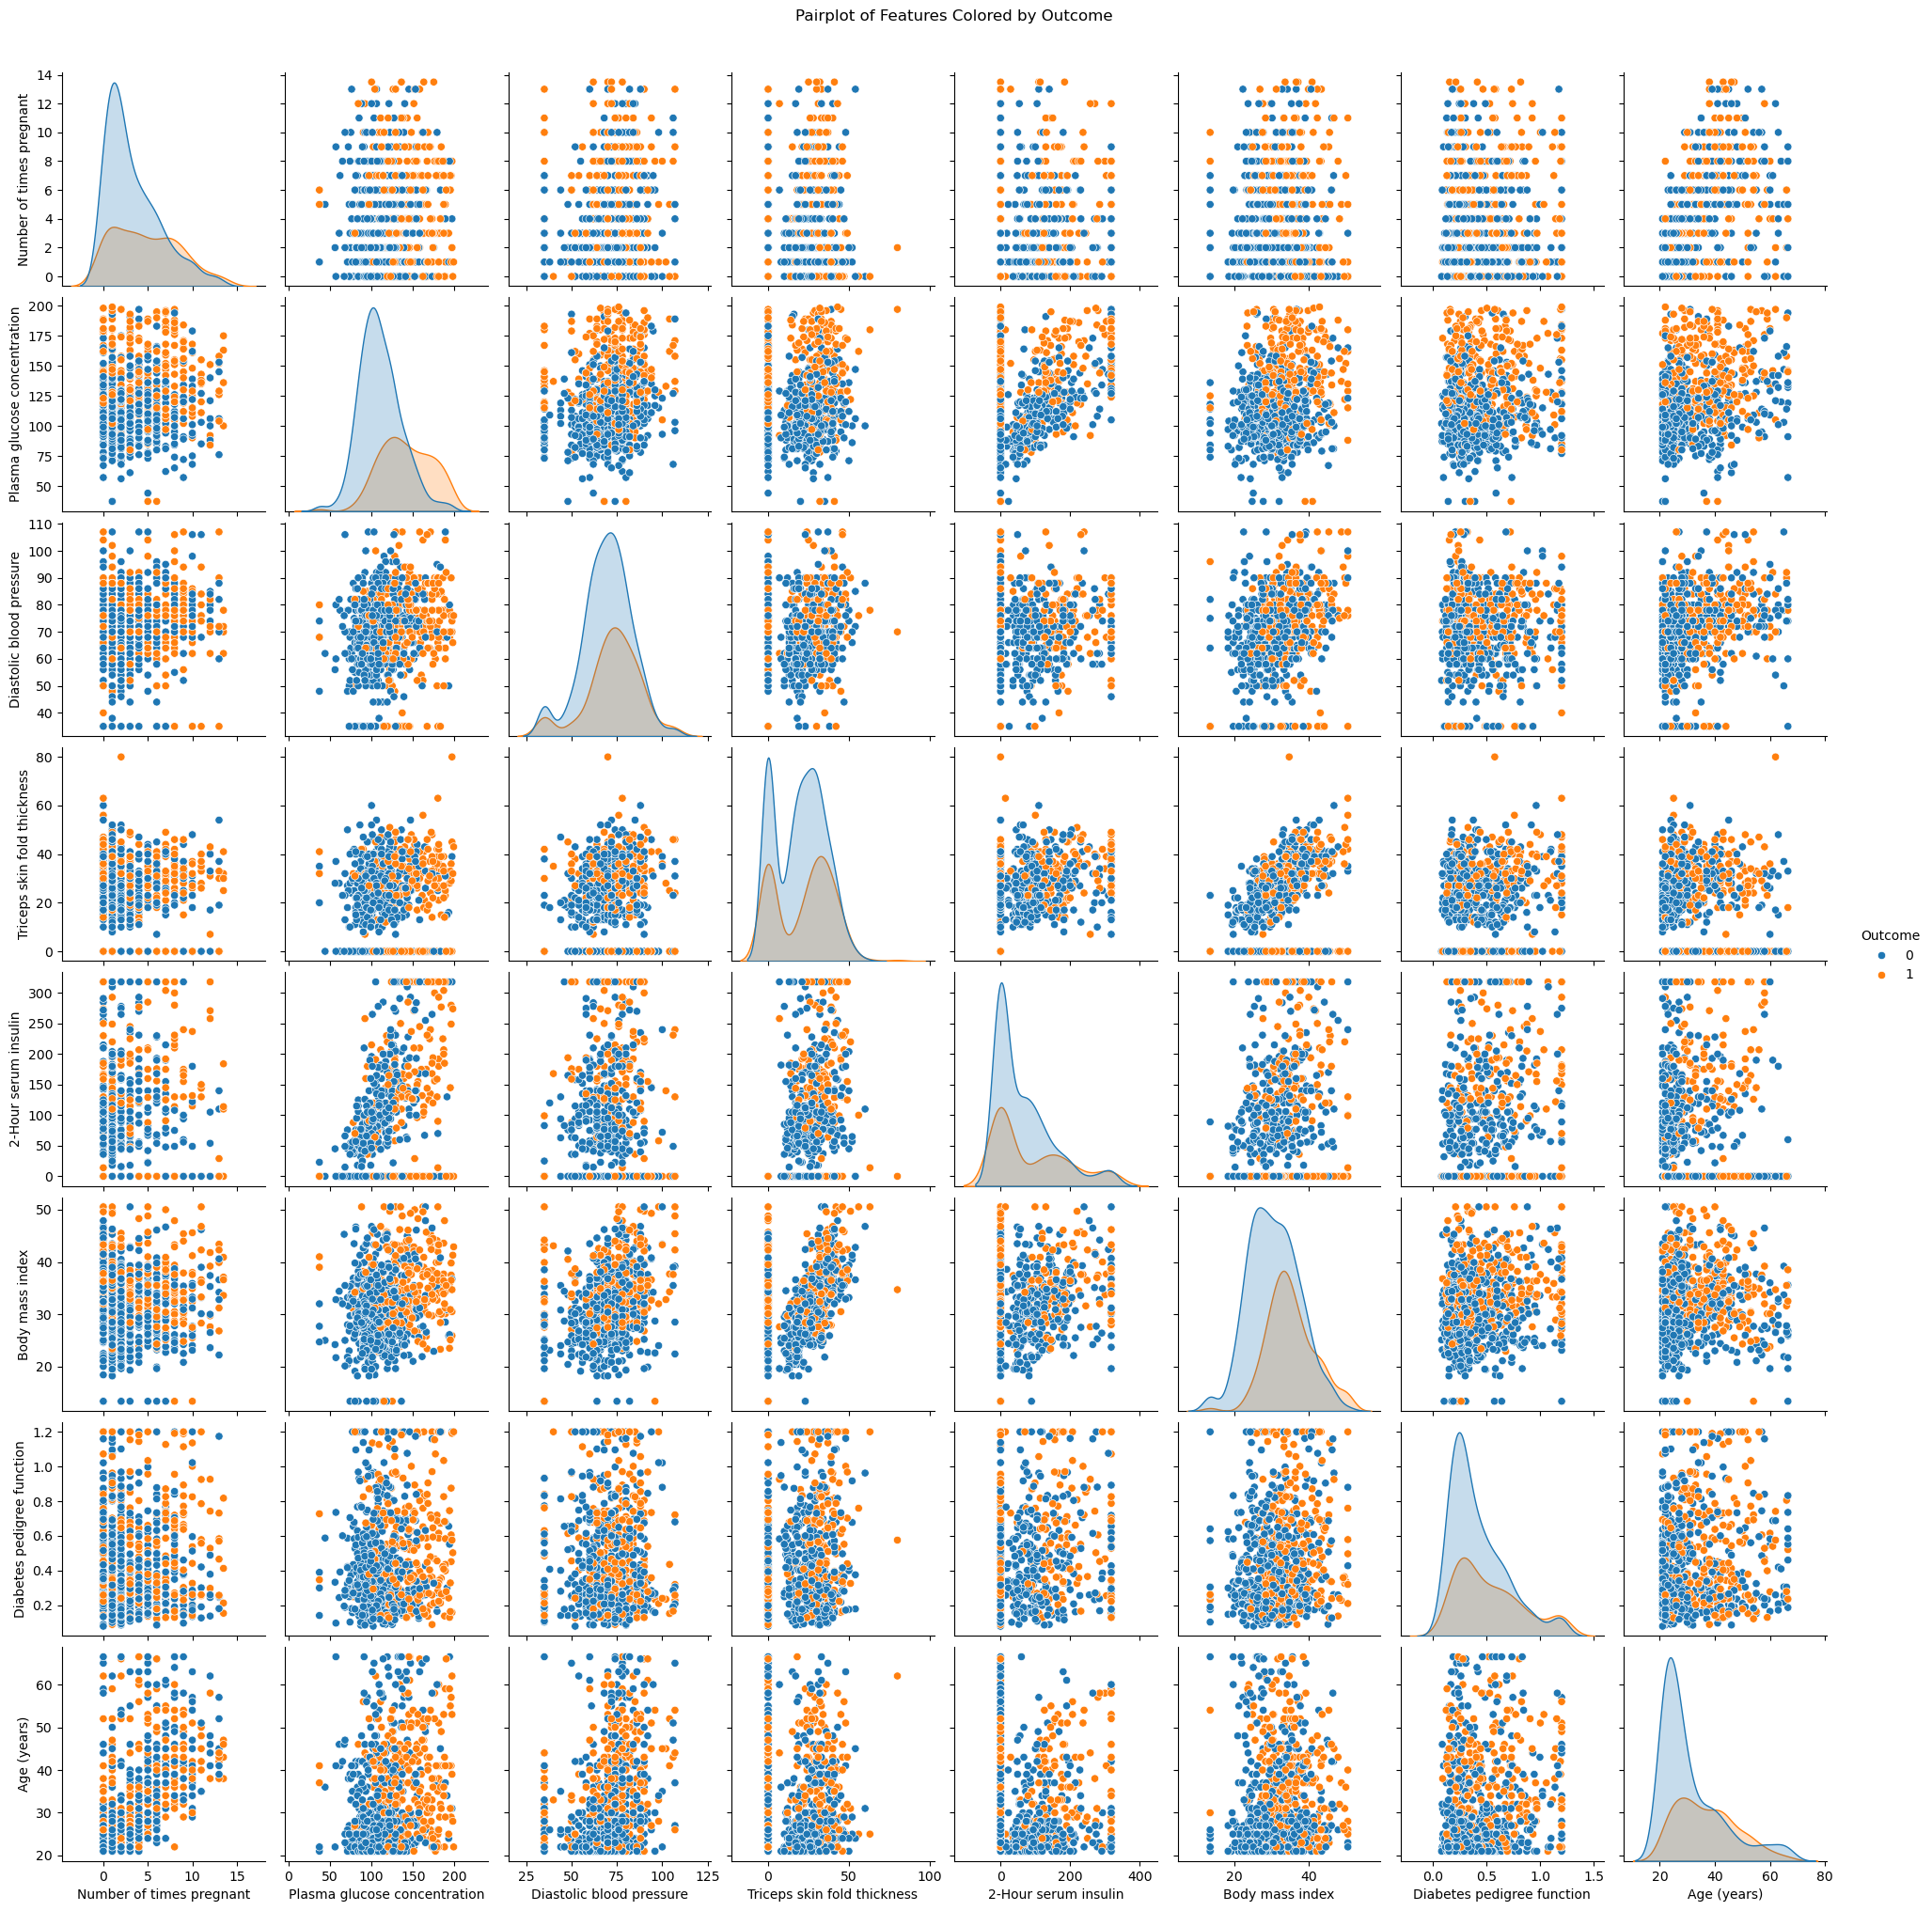

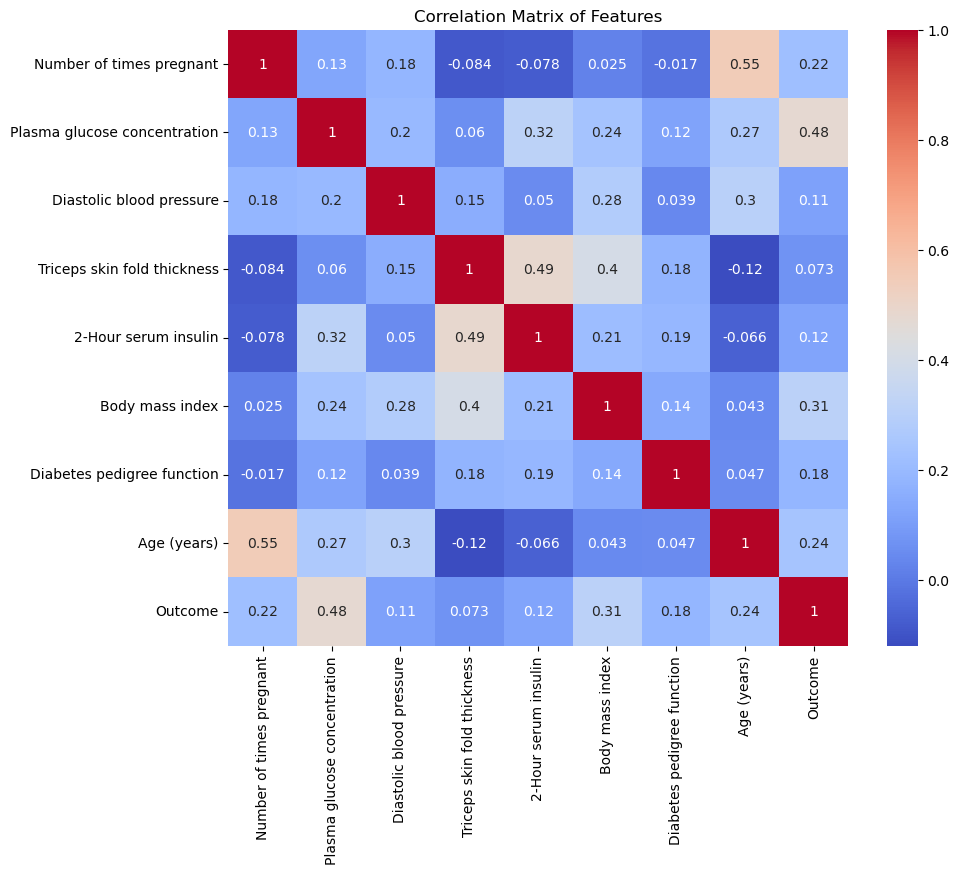

In [42]:
# 4. Exploratory Data Analysis (EDA)
# Plot a pairplot to visualize relationships and class distribution
sns.pairplot(df, hue='Outcome')
plt.suptitle("Pairplot of Features Colored by Outcome", y=1.02)
plt.show()

# Plot a heatmap to visualize correlations among features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

In [44]:
#5.Splitting the Data and Feature Scaling
# Define features (X) and the target (y)
X = df[numeric_cols]
y = df['Outcome']

# Split the data: 80% training and 20% testing, using stratification for class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=42, 
    stratify=y
)

print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Scale the features to standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training set size: (614, 8)
Test set size: (154, 8)


In [46]:
 #6. Building and Training the Logistic Regression Model
# -------------------------------

# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [48]:
#7. Making Predictions and Evaluating the Model
# -------------------------------

# Predict outcomes for the test set
y_pred = model.predict(X_test_scaled)

# Print accuracy and the full classification report
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7012987012987013

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

Confusion Matrix:
[[81 19]
 [27 27]]


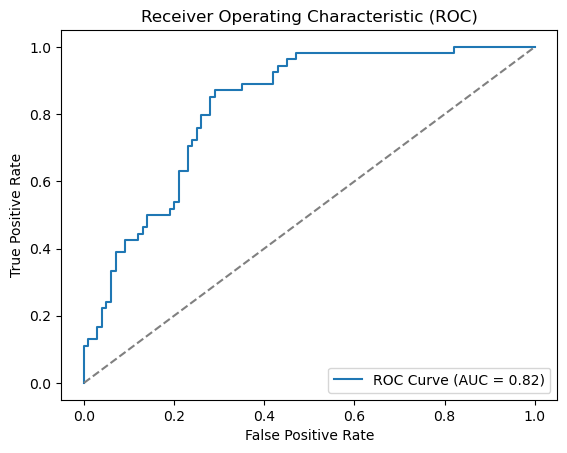

In [50]:
#8. ROC Curve and AUC Score
# Predict probabilities for the positive class (diabetic cases)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate false positive rates, true positive rates, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()